# -----------------------------
# Task 1: Brent Oil Price EDA
# -----------------------------

In [ ]:
# 1️⃣ Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller

# Set plotting style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 5)

# -----------------------------
# 2️⃣ Load Brent Oil Price Data
# -----------------------------

In [ ]:
# Replace with your path
df = pd.read_csv("../data/raw/BrentOilPrices.csv")

# Convert 'Date' to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Sort data by date
df = df.sort_values('Date')

# Set Date as index
df.set_index('Date', inplace=True)

# Quick look at data
print(df.head())
print(df.describe())

C:\Users\Dell\AppData\Local\Temp\ipykernel_2284\4169960185.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'])


            Price
Date             
1987-05-20  18.63
1987-05-21  18.45
1987-05-22  18.55
1987-05-25  18.60
1987-05-26  18.63
             Price
count  9011.000000
mean     48.420782
std      32.860110
min       9.100000
25%      19.050000
50%      38.570000
75%      70.090000
max     143.950000


# -----------------------------
# 3️⃣ Initial Time Series Visualization
# -----------------------------

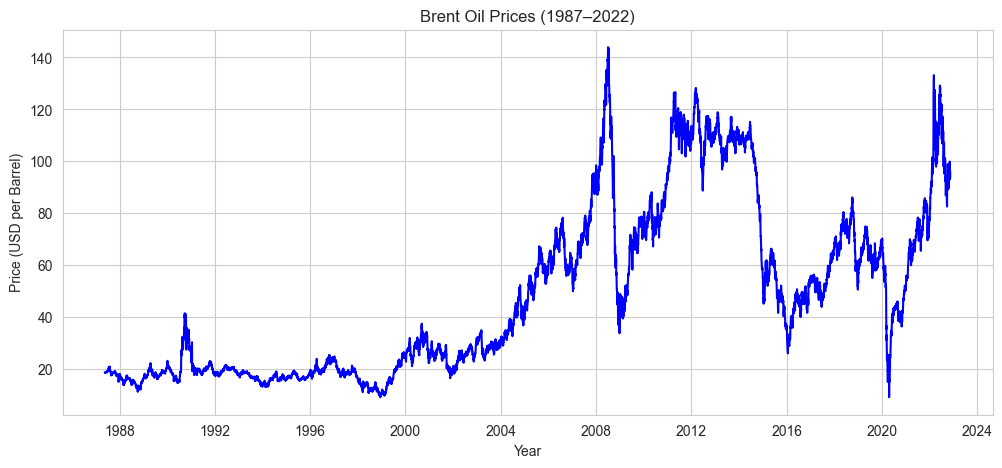

In [ ]:
plt.plot(df.index, df['Price'], color='blue')
plt.title("Brent Oil Prices (1987–2022)")
plt.xlabel("Year")
plt.ylabel("Price (USD per Barrel)")
plt.show()

# -----------------------------
# 4️⃣ Trend Analysis (Rolling Mean)
# -----------------------------

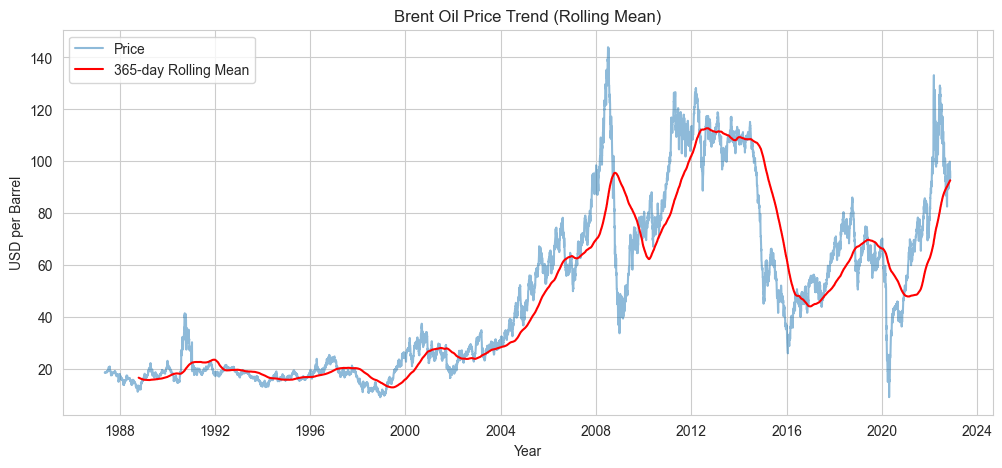

In [ ]:

# 365-day rolling mean
df['RollingMean_365'] = df['Price'].rolling(window=365).mean()

plt.plot(df['Price'], alpha=0.5, label='Price')
plt.plot(df['RollingMean_365'], color='red', label='365-day Rolling Mean')
plt.title("Brent Oil Price Trend (Rolling Mean)")
plt.xlabel("Year")
plt.ylabel("USD per Barrel")
plt.legend()
plt.show()

# -----------------------------
# 5️⃣ Volatility Analysis (Log Returns)
# -----------------------------

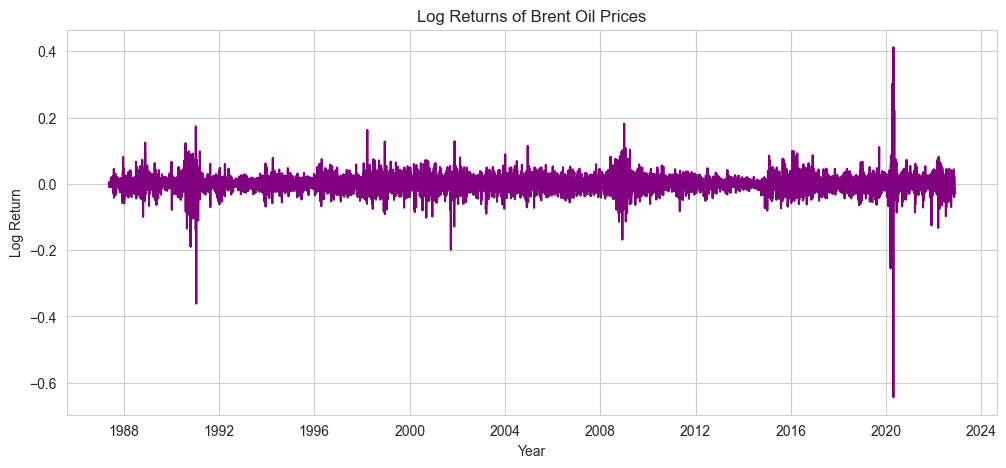

In [ ]:
df['Log_Returns'] = np.log(df['Price'] / df['Price'].shift(1))

plt.plot(df['Log_Returns'], color='purple')
plt.title("Log Returns of Brent Oil Prices")
plt.xlabel("Year")
plt.ylabel("Log Return")
plt.show()

# -----------------------------
# 6️⃣ Stationarity Check (ADF Test)
# -----------------------------

In [ ]:
# On Price
adf_price = adfuller(df['Price'].dropna())
print("ADF Statistic (Price):", adf_price[0])
print("p-value:", adf_price[1])

# On Log Returns
adf_returns = adfuller(df['Log_Returns'].dropna())
print("ADF Statistic (Log Returns):", adf_returns[0])
print("p-value:", adf_returns[1])

ADF Statistic (Price): -1.9938560113924675
p-value: 0.28927350489340287
ADF Statistic (Log Returns): -16.42711349448591
p-value: 2.4985801611427818e-29


# -----------------------------
# 7️⃣ Create Event Dataset
# -----------------------------

In [ ]:
events = [
    ("2003-03-20", "US-led invasion of Iraq", "Geopolitical Conflict"),
    ("2008-09-15", "Global Financial Crisis (Lehman Collapse)", "Economic Shock"),
    ("2010-12-17", "Arab Spring begins", "Political Instability"),
    ("2014-11-27", "OPEC maintains production levels", "OPEC Policy"),
    ("2016-01-16", "Iran sanctions lifted", "Sanctions"),
    ("2016-11-30", "OPEC production cut agreement", "OPEC Policy"),
    ("2018-05-08", "US exits Iran nuclear deal", "Sanctions"),
    ("2020-03-11", "COVID-19 declared a pandemic", "Global Crisis"),
    ("2020-04-12", "OPEC+ historic production cuts", "OPEC Policy"),
    ("2021-10-01", "Global energy supply crunch", "Economic Shock"),
    ("2022-02-24", "Russia invades Ukraine", "Geopolitical Conflict"),
    ("2022-03-08", "US bans Russian oil imports", "Sanctions"),
    ("2022-06-02", "OPEC+ limited output increase", "OPEC Policy")
]

events_df = pd.DataFrame(events, columns=["Event_Date", "Event_Description", "Category"])
events_df['Event_Date'] = pd.to_datetime(events_df['Event_Date'])

# Save to CSV (inside data folder)
events_df.to_csv("../data/processed/events.csv", index=False)


In [ ]:
# Preview events
print(events_df)

   Event_Date                          Event_Description  \
0  2003-03-20                    US-led invasion of Iraq   
1  2008-09-15  Global Financial Crisis (Lehman Collapse)   
2  2010-12-17                         Arab Spring begins   
3  2014-11-27           OPEC maintains production levels   
4  2016-01-16                      Iran sanctions lifted   
5  2016-11-30              OPEC production cut agreement   
6  2018-05-08                 US exits Iran nuclear deal   
7  2020-03-11               COVID-19 declared a pandemic   
8  2020-04-12             OPEC+ historic production cuts   
9  2021-10-01                Global energy supply crunch   
10 2022-02-24                     Russia invades Ukraine   
11 2022-03-08                US bans Russian oil imports   
12 2022-06-02              OPEC+ limited output increase   

                 Category  
0   Geopolitical Conflict  
1          Economic Shock  
2   Political Instability  
3             OPEC Policy  
4               San

In [ ]:
import sys
from pathlib import Path

sys.path.append(str(Path().resolve().parent))

C:\Users\Dell\Pictures\brent-oil-analysis\src\data_loader.py:19: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'], errors='coerce')


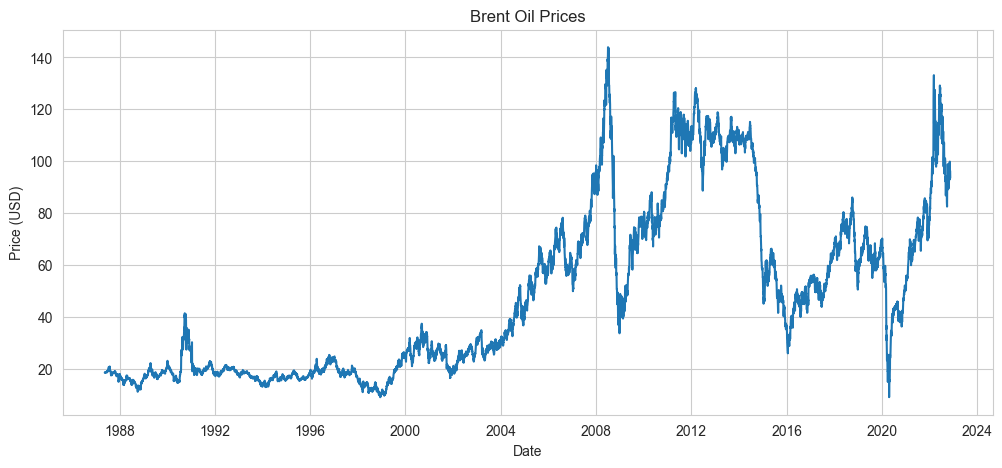

ADF Test on Log Returns: {'ADF Statistic': np.float64(-16.42711349448591), 'p-value': np.float64(2.4985801611427818e-29), 'Is Stationary (5%)': np.True_}


In [ ]:
# from src.config import RAW_DATA_PATH, IMAGES_PATH
from src.config import RAW_DATA_PATH, IMAGES_PATH

from src.data_loader import load_price_data
from src.eda import plot_price, add_log_returns
from src.utils import adf_test

# Load data
df = load_price_data(RAW_DATA_PATH)

# Price visualization
plot_price(df, f"{IMAGES_PATH}/brent_price.png")

# Log returns & stationarity
df = add_log_returns(df)
print("ADF Test on Log Returns:", adf_test(df['Log_Returns']))


# -----------------------------
# 8️⃣ Observations 
# -----------------------------

1. Brent oil prices exhibit non-stationary behavior, consistent with long-term economic trends.
2. Log returns display volatility clustering, especially during crisis periods (2008, 2020, 2022).
3. The rolling mean highlights major regime shifts and long-term price cycles.
4. ADF results confirm log returns are stationary, making them suitable for change point modeling.
5. A structured event dataset enables linking price shifts to geopolitical and economic events.
